## Summary

In [1]:
import pandas as pd
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
path = r'./data/' # use your path
all_csv = glob.glob(os.path.join(path, "*.csv"))

tweets = []

for filename in all_csv:
    df = pd.read_csv(filename, index_col=None, header=0)
    tweets.append(df)
    
tweets_df = pd.concat(tweets, axis=0, ignore_index=True)
tweets_df

,Unnamed: 0,tweet_id,tweet_text,language,tweet_created_at,retweet,favorite,hashtags,user_id,user_name,user,user_loc,user_follower,friends_count,media,tweet_url
0,1173,1323051948485070853,Este mes estaré participando en el #30DayMapCh...,es,2020-11-01 23:59:00,1,10,"[{'text': '30DayMapChallenge', 'indices': [35,...",1002117891133755392,José Molano-Pulido,JoseFMolano,NaN,261,437,http://pbs.twimg.com/media/ElxsT-SWkAAhiSj.png,https://t.co/Qw7z5xS2Qh
1,1176,1323046291367100416,Antes de que acabe el día. Uno de mis primero...,es,2020-11-01 23:36:31,16,72,"[{'text': '30DayMapChallenge', 'indices': [83,...",384907052,Leticia Luna,Letyludigital,México,1121,2447,http://pbs.twimg.com/media/ElxnlwaVcAEq9yb.jpg,https://t.co/KXhtzKjh2e
2,1177,1323043516629614595,We'll see if I stick with this #30DayMapChalle...,en,2020-11-01 23:25:29,2,15,"[{'text': '30DayMapChallenge', 'indices': [31,...",704329847896678400,Ross Thorn,RealRossThorn,Minnesota,323,482,http://pbs.twimg.com/media/Elxk6HSXEBg-O8d.jpg,https://t.co/QGuHH8qogZ
3,1178,1323042272146034689,Day 1 of #30DayMapChallenge - Points\n\nQuickl...,en,2020-11-01 23:20:33,3,11,"[{'text': '30DayMapChallenge', 'indices': [9, ...",863722747,Tim Rodaway,TimRodaway,"Newcastle Upon Tyne, England",94,283,http://pbs.twimg.com/media/ElxjSlZW0AIxSnq.jpg,https://t.co/yPIDpPpSIJ
4,1179,1323042145255698449,#30DayMapChallenge day 1 Points\nFirst attempt...,en,2020-11-01 23:20:03,1,2,"[{'text': '30DayMapChallenge', 'indices': [0, ...",3641471067,Bert H,BertrandHoud,"Auvergne, France",64,259,http://pbs.twimg.com/media/ElxjxjNXUAAVWUC.jpg,https://t.co/0hCmCUWb5a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2118,406,1324507315744038912,"Day 5, Blue. #30DayMapChallenge, cuencas y sem...",es,2020-11-06 00:22:06,2,6,"[{'text': '30DayMapChallenge', 'indices': [13,...",384907052,Leticia Luna,Letyludigital,México,1123,2447,http://pbs.twimg.com/media/EmGYDR1UYAIlq-m.jpg,https://t.co/INsceOsBfD
2119,407,1324505281993363458,#30DayMapChallenge \n\nDay 6 Suggestion (Novem...,en,2020-11-06 00:14:02,1,0,"[{'text': '30DayMapChallenge', 'indices': [0, ...",3160198320,Dr Chris #GIS #Success,DrChrisGeoSci,"Calgary, Alberta",705,660,http://pbs.twimg.com/media/EmGWiOFXUAQS2Ry.png,https://t.co/ws8bK5YNpV
2120,408,1324503978860638209,Day 5: blue \n\nNZ statistical fisheries zones...,en,2020-11-06 00:08:51,1,3,"[{'text': '30DayMapChallenge', 'indices': [142...",12306,Luis Apiolaza 🧮🍃📷⏚,zentree,"Ōtautahi, Aotearoa",1279,282,http://pbs.twimg.com/media/EmGVUAOU8AAuhTy.jpg,https://t.co/FYSSFptaa2
2121,409,1324502843366277121,#30DayMapChallenge - we invite you to come to ...,en,2020-11-06 00:04:20,1,0,"[{'text': '30DayMapChallenge', 'indices': [0, ...",10365542,GreenMap,GreenMap,NYC,4572,3729,http://pbs.twimg.com/media/EmGT6_2XUAESLX6.jpg,https://t.co/Cp77iHUii1


In [3]:
tweets_df['date'] = tweets_df['tweet_created_at'].str[:10]

In [4]:
tweets_df

,Unnamed: 0,tweet_id,tweet_text,language,tweet_created_at,retweet,favorite,hashtags,user_id,user_name,user,user_loc,user_follower,friends_count,media,tweet_url,date
0,1173,1323051948485070853,Este mes estaré participando en el #30DayMapCh...,es,2020-11-01 23:59:00,1,10,"[{'text': '30DayMapChallenge', 'indices': [35,...",1002117891133755392,José Molano-Pulido,JoseFMolano,NaN,261,437,http://pbs.twimg.com/media/ElxsT-SWkAAhiSj.png,https://t.co/Qw7z5xS2Qh,2020-11-01
1,1176,1323046291367100416,Antes de que acabe el día. Uno de mis primero...,es,2020-11-01 23:36:31,16,72,"[{'text': '30DayMapChallenge', 'indices': [83,...",384907052,Leticia Luna,Letyludigital,México,1121,2447,http://pbs.twimg.com/media/ElxnlwaVcAEq9yb.jpg,https://t.co/KXhtzKjh2e,2020-11-01
2,1177,1323043516629614595,We'll see if I stick with this #30DayMapChalle...,en,2020-11-01 23:25:29,2,15,"[{'text': '30DayMapChallenge', 'indices': [31,...",704329847896678400,Ross Thorn,RealRossThorn,Minnesota,323,482,http://pbs.twimg.com/media/Elxk6HSXEBg-O8d.jpg,https://t.co/QGuHH8qogZ,2020-11-01
3,1178,1323042272146034689,Day 1 of #30DayMapChallenge - Points\n\nQuickl...,en,2020-11-01 23:20:33,3,11,"[{'text': '30DayMapChallenge', 'indices': [9, ...",863722747,Tim Rodaway,TimRodaway,"Newcastle Upon Tyne, England",94,283,http://pbs.twimg.com/media/ElxjSlZW0AIxSnq.jpg,https://t.co/yPIDpPpSIJ,2020-11-01
4,1179,1323042145255698449,#30DayMapChallenge day 1 Points\nFirst attempt...,en,2020-11-01 23:20:03,1,2,"[{'text': '30DayMapChallenge', 'indices': [0, ...",3641471067,Bert H,BertrandHoud,"Auvergne, France",64,259,http://pbs.twimg.com/media/ElxjxjNXUAAVWUC.jpg,https://t.co/0hCmCUWb5a,2020-11-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2118,406,1324507315744038912,"Day 5, Blue. #30DayMapChallenge, cuencas y sem...",es,2020-11-06 00:22:06,2,6,"[{'text': '30DayMapChallenge', 'indices': [13,...",384907052,Leticia Luna,Letyludigital,México,1123,2447,http://pbs.twimg.com/media/EmGYDR1UYAIlq-m.jpg,https://t.co/INsceOsBfD,2020-11-06
2119,407,1324505281993363458,#30DayMapChallenge \n\nDay 6 Suggestion (Novem...,en,2020-11-06 00:14:02,1,0,"[{'text': '30DayMapChallenge', 'indices': [0, ...",3160198320,Dr Chris #GIS #Success,DrChrisGeoSci,"Calgary, Alberta",705,660,http://pbs.twimg.com/media/EmGWiOFXUAQS2Ry.png,https://t.co/ws8bK5YNpV,2020-11-06
2120,408,1324503978860638209,Day 5: blue \n\nNZ statistical fisheries zones...,en,2020-11-06 00:08:51,1,3,"[{'text': '30DayMapChallenge', 'indices': [142...",12306,Luis Apiolaza 🧮🍃📷⏚,zentree,"Ōtautahi, Aotearoa",1279,282,http://pbs.twimg.com/media/EmGVUAOU8AAuhTy.jpg,https://t.co/FYSSFptaa2,2020-11-06
2121,409,1324502843366277121,#30DayMapChallenge - we invite you to come to ...,en,2020-11-06 00:04:20,1,0,"[{'text': '30DayMapChallenge', 'indices': [0, ...",10365542,GreenMap,GreenMap,NYC,4572,3729,http://pbs.twimg.com/media/EmGT6_2XUAESLX6.jpg,https://t.co/Cp77iHUii1,2020-11-06


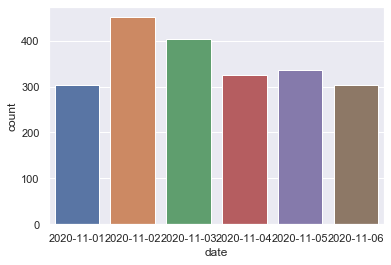

In [5]:
sns.set_theme()

sns.countplot(x="date", data=tweets_df)

plt.savefig("./graphs/maps_count.png")